# ARMAモデル系

　定常時系列モデルとして以下のモデルについて見ていく.

- 自己回帰モデル ${\rm AR}(p)$
- 移動平均モデル ${\rm MA}(q)$
- 自己回帰移動平均モデル ${\rm ARMA}(p, q)$

## 1. ラグ演算子

 差分作用子ならびにラグ演算は関数解析学の領域でシフト作用子として厳密に定義, 定理が整理されているが, ここでは時系列モデルの表現の簡略化のために最低限の内容だけ整理.

### 定義 1.1 (差分作用子)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　**差分作用素**または**差分演算子** (difference operator) とは関数に対して適当な有限差分を与える作用素として定義され, 特に**前進差分作用素** (forward difference operator) $\Delta$ を時系列 $y_t$ に作用する場合

$$
    \Delta y_{y} = y_{t+1}- y_{t}
$$

と書ける. また**後退差分作用素** (backward difference operator) $\nabla$ は

$$
    \nabla y_{y} = y_{t} - y_{t-1}
$$

と書ける.

</div>

### 定義 1.2 (ラグ演算子)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　時系列 $y_t$ に対して**後退オペレーター** (lag operator) $L$ は 整数 $k$ を用いて以下で定義される.

$$
    L^k y_t = y_{t-k}
$$

</div>


### 定義 1.3 (ラグ多項式)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　**ラグ多項式** (lag polynomials) $a(L)$ を $a(L) = a_0 + a_1 L + \cdots + a_p L^p \ s.t. a_m \in \mathbb(R), m \in \mathbb(N)$ とする. この時, 時系列 $\{ y_t \}$ に対して作用した $a(L)y_t$ は以下のように書ける.

$$
    \begin{align}
        a(L) y_t &= a_0 y_t + a_1 L y_t + \cdots + a_p L^p y_t \\
                 &= a_0 y_t + a_1 y_{t-1} + \cdots + a_p y_{t-p}
    \end{align}
$$

</div>

### 命題 1.4 (ラグ代数)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　$a, b, c, d \in \mathbb{R}$, $i, j \in \mathbb{N}$ としたとき以下が成立する.

- (1) $(a + b)L = aL + bL$
- (2) $(a + bL)(c + dL) = ac + (ad + bc)L + bdL^2$
- (3) $L^i L^j = L^{i+j}$
- (4) $L^{-1} L = 1$
- (5) $\dfrac{1}{1-aL} = 1 + aL + a^2 L^2 + \cdots =\displaystyle \sum_{i=0}^{\infty}{(aL)^i} \quad (|aL| < 1)$

</div>

### 命題 1.5 (ラグ演算子と差分作用子の関係)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　ラグ演算子 $L$ と後退差分作用子 $\nabla$ は以下の関係にある.

$$
    \begin{align}
        \nabla y_t = (1 - L) y_t
    \end{align}
$$

</div>

## 2. ARモデル

### 定義 2.1 (${\rm AR}(p)$モデル)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　時系列 $\{ y_t \}$ について $t = 1, 2, \cdots, T $ のとき **自己回帰モデル** (autoregressive model, AR model) は以下で定義する.

$$
    y_t = c + \sum_{i=1}^{p} {\phi_{i} y_{t-i}} + \varepsilon_t \quad s.t. \ c \in \mathbb{R}, p \in \mathbb{N}, \varepsilon_t \sim \text{WN}(0, \sigma_{\varepsilon}^2)
$$

このとき **$\text{AR}(p)$** と表す. ここで, $c$ は切片, $p$ は**自己回帰の次数**, $\phi_i$ を **$i$ 次の自己回帰係数**, $\varepsilon_t$ はホワイトノイズで表現される誤差項である.

</div>

ここでラグ多項式 $\phi_p(L)$ 
    
$$
    \begin{align}
        \phi_p(L) = 1 - (\phi_1 L^{1} + \cdots + \phi_p L^{p}) = 1 - \sum_{i=1}^{p}{\phi_i L^{i}}
    \end{align}
$$

を用いて

$$
    \phi_p(L)y_t = c + \varepsilon_t
$$

とも表現できる.

### 例 2.2 (statsmodels による AR モデル)

#### ドキュメント

　詳細については適宜ドキュメントを参考にすること.

- `statsmodels.tsa.ar_model.AutoReg`
    - $\text{AR}(p)$ モデルを構築するためのクラスモジュール.
    - [ARモデル構築例 (公式)](https://www.statsmodels.org/stable/examples/notebooks/generated/autoregressions.html)
    - [APIドキュメント](https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AutoReg.html#statsmodels.tsa.ar_model.AutoReg)
- `statsmodels.tsa.ar_model.ar_select_order`
    - 情報量基準が最適な $\text{AR}(p)$ の次数を選択し, その次数をもとにした `statsmodels.tsa.ar_model.AutoReg` インスタンスを返すメソッド.
    - [APIドキュメント](https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.ar_select_order.html)
- `statsmodels.tsa.arima.model.ARIMA`
    - $\text{AR}(p)$ モデルだけでなく, より一般的な ${\rm SARIMAX}(p, d, q)\times(P, D, Q, s)$ を構築可能なクラスモジュール.
    - [APIドキュメント](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html#generated-statsmodels-tsa-arima-model-arima--page-root)


#### 具体例

　`statsmodels.tsa.arima.model.ARIMA` で実際に構築してみる. その際に, `sandbox.datasets.air_passengers` にあるデータで実行する.


In [1]:
# 必要ライブラリを一括してインポートし図示の設定を実行.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
from scipy.special import boxcox, inv_boxcox
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# from statsmodels.tsa.seasonal import seasonal_decompose

sns.set()
pd.plotting.register_matplotlib_converters()
sns.mpl.rc("figure", figsize=(18, 5))
sns.mpl.rc("font", size=14)

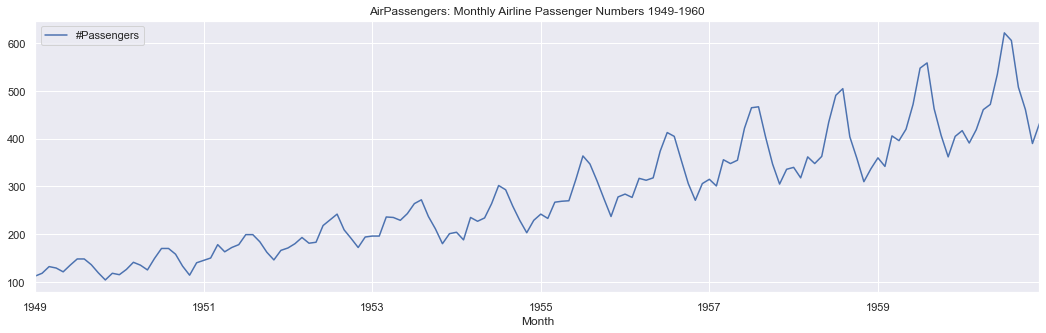

In [2]:
# analytics-sandbox にあるテストデータをインポート.
from sandbox.datasets import air_passengers

# データの読み込み
psgr = air_passengers.load().data

fig, ax = plt.subplots()
psgr.plot(ax=ax, title=f"{air_passengers.TITLE}")
plt.show()

　もし `sandbox` をインストールしていない場合は GitHub でクローンした後に `python setup.py install` を行うか, URL をして直接取得するかを行なえばよい.

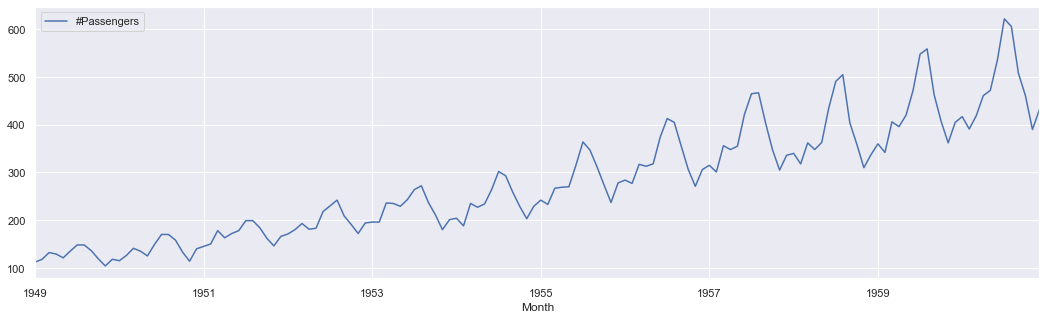

In [3]:
url = "https://raw.githubusercontent.com/sndpgm/analytics-sandbox/main/sandbox/datasets/air_passengers/air_passengers.csv"

psgr = pd.read_csv(url)
psgr.index = pd.to_datetime(psgr["Month"])
psgr.drop(columns=["Month"], inplace=True)
psgr.index.freq = "MS"

fig, ax = plt.subplots()
ax = psgr.plot(ax=ax)
plt.show()

　波形を見ると `air_passengers` データは非定常な時系列データのため定常時系列に近づけていく. 定常性については[時系列データ > 2.定常性](tsa:time_series:stationarity) を参照のこと.
　定常時系列に近づけるために以下を勘案することが必要.

- 平均非定常 → 上昇トレンドのため時間が経つほどに平均値が増加 → [階差](tsa:time_series:preprocess:difference) を取ることで線形トレンドを消去.
- 共分散非定常 → 時間が経つほどにブレ幅が増加 → [Box-Cox変換](tsa:time_series:preprocess:boxcox) によって低減をトライ.
- 周期性 → 12ヶ月周期での季節要因が働いているように見える → ${\rm AR}(11)$ でモデリングを実施.

In [4]:
# scikit-learn でMAPE算出モジュールとデータを訓練用とテスト用に分割するモジュールを import
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# テストデータを 20% ととしてデータを分割する.
# ただし, 時系列データのためデータ順序がシャッフルされないように設定する.
test_size = 0.20
shuffle = False
psgr_train, psgr_test = train_test_split(psgr, test_size=test_size, shuffle=shuffle)

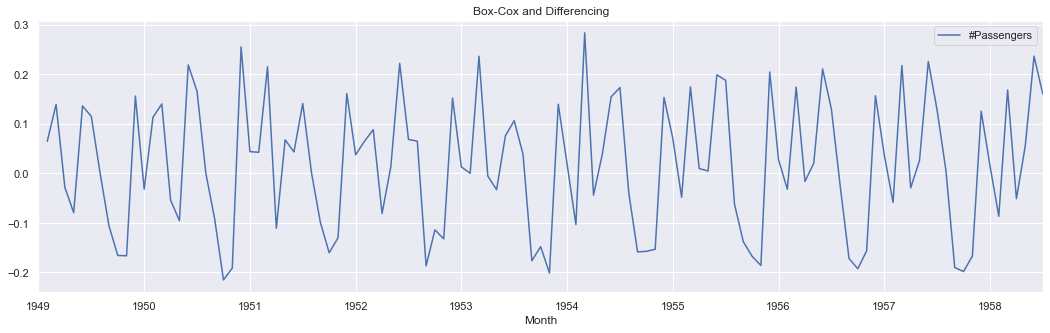

In [5]:
# trainデータについて加工し定常時系列に近づける
# Box-Cox 変換
boxcox_fitted, lam = stats.boxcox(psgr_train["#Passengers"])
psgr_train_boxcox = pd.DataFrame(
    boxcox(psgr_train["#Passengers"], lam), index=psgr_train.index
)

# 階差
psgr_train_boxcox_diff = pd.DataFrame(
    psgr_train_boxcox - psgr_train_boxcox.shift(), index=psgr_train.index
)

# 図示
fig, ax = plt.subplots()
psgr_train_boxcox_diff.plot(ax=ax, title="Box-Cox and Differencing")
plt.show()

In [6]:
# ADF検定で定常性が確認できるかチェック.
# pvalue < 0.05 より定常性があるとして次に進める.
ret_ = adfuller(psgr_train_boxcox_diff.dropna())
ret_keys = ["adfstat", "pvalue", "usedlag", "nobs", "critvalues", "icbest"]

i = 0
ret = dict()
for key in ret_keys:
    ret[key] = ret_[i]
    i += 1

ret

{'adfstat': -2.644121933450108,
 'pvalue': 0.08421665282428747,
 'usedlag': 12,
 'nobs': 101,
 'critvalues': {'1%': -3.4968181663902103,
  '5%': -2.8906107514600103,
  '10%': -2.5822770483285953},
 'icbest': -286.9590455026573}

In [13]:
# AR(11) モデル
p = 11
model = ARIMA(psgr_train_boxcox_diff, order=(p, 0, 0))
model_fitted = model.fit()
print(model_fitted.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  115
Model:                ARIMA(11, 0, 0)   Log Likelihood                 144.389
Date:                Tue, 19 Jul 2022   AIC                           -262.778
Time:                        01:38:00   BIC                           -227.094
Sample:                    01-01-1949   HQIC                          -248.294
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0135      0.001     15.504      0.000       0.012       0.015
ar.L1         -0.5405      0.092     -5.877      0.000      -0.721      -0.360
ar.L2         -0.7063      0.064    -11.080      0.0

/Users/yuta.sonoda/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [8]:
# 予測期間はテストデータの期間
start = psgr_test.index.min()
end = psgr_test.index.max()

# 予測値とともに 95% 信頼区間も算出
alpha = 0.05

# get_prediction メソッドにより予測結果インスタンスを取得
# 信頼区間を求める場合には予測結果インスタンスを経由し conf_int メソッドから計算
predict_result = model_fitted.get_prediction(start=start, end=end)

# 予測値 Series を取得
predict = predict_result.predicted_mean

# 信頼区間の格納された DataFrame を取得
df_ci = predict_result.conf_int(alpha=alpha)

# 予測値と信頼区間を一つの DataFrame にまとめる
df_predict = pd.DataFrame(predict)
df_predict = df_predict.join(df_ci)

# 結果の確認
df_predict.head(15)

,predicted_mean,lower #Passengers,upper #Passengers
1958-08-01,0.061463,-0.063029,0.185956
1958-09-01,-0.097127,-0.238640,0.044385
1958-10-01,-0.200663,-0.351278,-0.050048
1958-11-01,-0.168260,-0.318920,-0.017600
1958-12-01,0.073067,-0.079202,0.225335
1959-01-01,0.007349,-0.146236,0.160933
1959-02-01,-0.048439,-0.202030,0.105153
1959-03-01,0.075168,-0.078714,0.229049
1959-04-01,-0.022689,-0.177490,0.132112
1959-05-01,0.074130,-0.082009,0.230269


　ここで予測した値について再考する. 元々の時系列 $\{ y_t \}$ について Box-Cox 変換した時系列を $\{ y'_t \}$ とする. すなわち,

$$
    y'_t = {\rm BoxCox}(y_t)
$$

である. これに対して階差をとった時系列 $\{ Y_t \}$ とすれば

$$
    Y_t = \nabla y'_t = {\rm BoxCox}(y_t) - {\rm BoxCox}(y_{t-1})
$$

を学習し予測値を算出した. ゆえに予測値を $\{ y_t \}$ スケールに戻すためには階差の逆の処理をする必要があるが, 予測開始時点を $t = T_s$, 予測終了時点を $t = T_e$ とする. また算出した予測値を $\hat{Y}_t$ とすれば, $\{ \hat{Y}_{T_s}, \hat{Y}_{T_s + 1}, \dots, \hat{Y}_{T_e} \}$ が予測された列となる.  
　$T_s \leq i \leq T_e$ とすれば, 
 
$$
    \hat{Y}_t = {\rm BoxCox}(\hat{y}_t) - {\rm BoxCox}(\hat{y}_{t-1})
$$

と表すと ${\rm BoxCox}(\hat{y}_i)$ は下記式々の和をとる.

$$
    \begin{align}
        \begin{matrix}
            \hat{Y}_{T_s}   & =      & {\rm BoxCox}(\hat{y}_{T_s})   & - & {\rm BoxCox}(\hat{y}_{T_s-1}) \\
            \hat{Y}_{T_s+1} & =      & {\rm BoxCox}(\hat{y}_{T_s+1}) & - & {\rm BoxCox}(\hat{y}_{T_s})   \\
                            & \cdots &                               &   &                               \\
            \hat{Y}_{i-1}   & =      & {\rm BoxCox}(\hat{y}_{i-1})   & - & {\rm BoxCox}(\hat{y}_{i-2})   \\
            \hat{Y}_{i}     & =      & {\rm BoxCox}(\hat{y}_{i})     & - & {\rm BoxCox}(\hat{y}_{i-1})
        \end{matrix}
    \end{align}
$$

つまり

$$
    \begin{align}
                          & {\rm BoxCox}(\hat{y}_{i}) - {\rm BoxCox}(\hat{y}_{T_s-1}) = \sum_{k=T_s}^{i}{\hat{Y}_{k}} \\
        \Leftrightarrow \ & {\rm BoxCox}(\hat{y}_{i}) = {\rm BoxCox}(\hat{y}_{T_s-1}) + \sum_{k=T_s}^{i}{\hat{Y}_{k}}
    \end{align}
$$

ここで ${\rm BoxCox}(\hat{y}_{T_s-1})$ は学習データから取得でき, $\displaystyle \sum_{k=T_s}^{i}{\hat{Y}_{k}}$ は `cumsum` メソッドで求めた予測値を足していけば良い.

In [9]:
init = psgr_train_boxcox["#Passengers"][-1]
df_predict_cumsum = df_predict.cumsum() + init
df_predict_cumsum_inv_boxcox = inv_boxcox(df_predict_cumsum, lam)
df_predict_cumsum_inv_boxcox.head(10)

,predicted_mean,lower #Passengers,upper #Passengers
1958-08-01,514.369381,468.090308,564.999554
1958-09-01,477.908625,390.259613,584.175716
1958-10-01,410.244013,297.793931,562.596969
1958-11-01,360.656684,232.299312,555.191043
1958-12-01,381.442632,218.309259,657.455631
1959-01-01,383.595376,194.565877,741.253072
1959-02-01,369.616677,165.788508,801.415316
1959-03-01,391.523770,155.716926,949.014232
1959-04-01,384.783814,135.107276,1045.599934
1959-05-01,407.224833,126.490235,1236.796166


In [10]:
mape = mean_absolute_percentage_error(
    psgr_test, df_predict_cumsum_inv_boxcox["predicted_mean"]
)
mape_msg = f"MAPE: {round(mape, 3)}"
print(mape_msg)

MAPE: 0.099


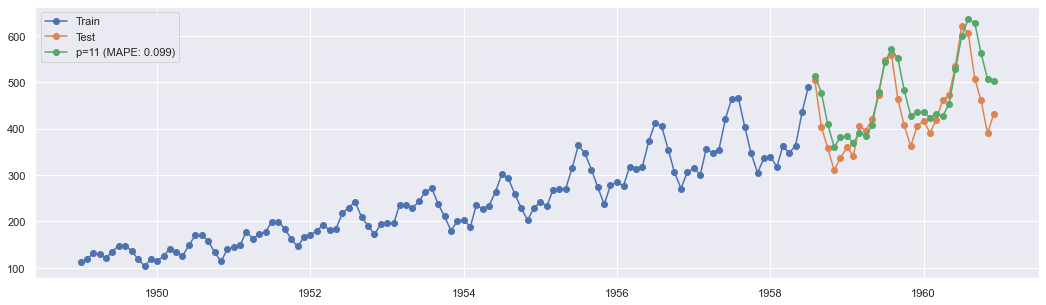

In [11]:
fig, ax = plt.subplots()
plt.plot(psgr_train, marker="o", label="Train")
plt.plot(psgr_test, marker="o", label="Test")
plt.plot(
    df_predict_cumsum_inv_boxcox["predicted_mean"],
    marker="o",
    label=f"p={p} ({mape_msg})",
)

plt.legend()
plt.show()

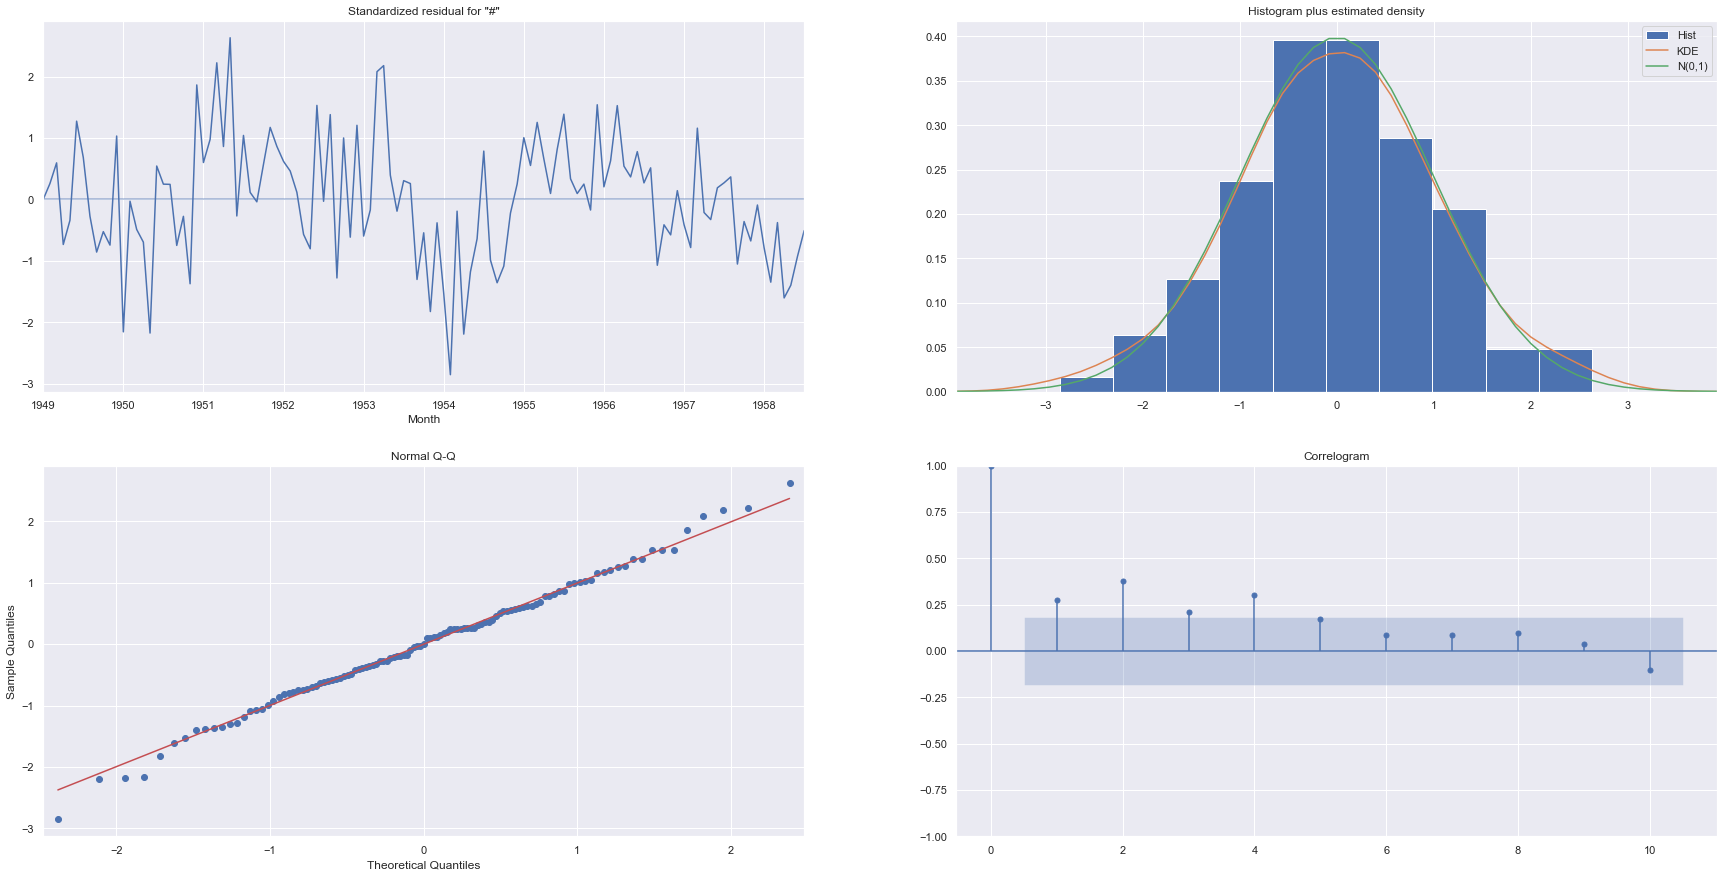

In [12]:
fig = model_fitted.plot_diagnostics(figsize=(30, 15))
plt.show()

## 3. MAモデル


### 定義 3.1 (${\rm MA}(q)$モデル)


## 4. ARMAモデル


### 定義 4.1 (${\rm ARMA}(p, q)$モデル)


## 参考文献

- ラグ演算子
    - _時系列分析：後退オペレータについて_. (2020, August 9). Hatena. Retriece July 18, 2022, from https://messefor.hatenablog.com/entry/2020/08/09/185747
        - 日本語でラグ演算子について細かく説明している.
    - Hibbs, D. (n.d.). _Lag operations and first-order difference equations_. http://www.douglas-hibbs.com/MacroLectures/LagOperatorsAndDifferenceEquations.pdf
        - 英語であるがラグ演算子について詳しく記載されている.
